# **Módulo 44 - Introducción a la Clasificación**

En este módulo nos adentraremos en el fascinante mundo de la clasificación dentro del ámbito del machine learning superrvisado, con un enfoque especial en la regresión logística. Exploraremos los fundamentos y aplicaciones prácticas de esta técnica, destacando su utilidad en la predicción de eventos binarios:

### **Fundamentos de la Clasificación**

Introduciremos la clasificación como un modelo supervisado donde los datos están etiquetados, permitiendo predecir si una variable dependiente pertenece a una de dos clases. Aprenderemos a utilizar la regresión logística para modelar la probabilidad de eventos binarios.

### **Preparación y Análisis de Datos**

Profundizaremos en la preparación y análisis de conjuntos de datos para modelos de predicción, enfatizando la transformación de datos categóricos en numéricos, la imputación de datos nulos y el análisis de correlación para identificar multicolinealidades.

### **Creación y Evaluación de Modelos**

Nos centraremos en la creación de modelos de clasificación para predecir eventos, abordando el análisis bivariado, el feature engineering y el manejo de clases desbalanceadas. Evaluaremos los modelos mediante métricas como la matriz de confusión, precisión, recall, y el F1 Score.

____

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\50_Módulo_44_Introducción_Clasificación\Modulo_44_Introduccion_a_la_Clasificacion')
df = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\50_Módulo_44_Introducción_Clasificación\Modulo_44_Introduccion_a_la_Clasificacion\general_data_.csv')

In [2]:
df.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1965,39,No,Travel_Frequently,Sales,11,3,Marketing,1,1966,Male,...,1.0,Y,11,8,0,21.0,3,21,2,8
2666,45,No,Travel_Rarely,Sales,24,3,Life Sciences,1,2667,Male,...,8.0,Y,16,8,1,8.0,2,5,0,1
4377,59,No,Travel_Rarely,Research & Development,5,3,Life Sciences,1,4378,Female,...,3.0,Y,13,8,0,7.0,2,1,0,0


# **Entendiendo el DataSet**

Descripción de las columnas del dataset.

- **Age** - Edad del empleado.
- **Attrition** - **Variable Dependiente**, indica si el empleado salió o no (yes/no).
- **BusinessTravel** - Definiciones de la frecuencia de viajes.
- **Department** - Unidad de negocio.
- **DistanceFromHome** - Distancia en millas a su casa.
- **Education** - Nivel educacional (#).
- **EducationField** - Campo de educación.
- **EmployeeCount** - 1.
- **EmployeeID** - ID del empleado.
- **Gender** - Masculino/Femenino.
- **JobLevel** - Nivel de trabajo.
- **JobRole** - Cargo.
- **MaritalStatus** - Estado civil (descripción).
- **MonthlyIncome** - Ingreso mensual
- **NumCompaniesWorked** - Número de empresas en las que trabajó antes.
- **Over18** - Si tiene más de 18 años.
- **PercentSalaryHike** - El último alza de salario.
- **StandardHours** - Cuántas horas estándar (#).
- **StockOptionLevel** - Nivel de entrega de ESOP (#).
- **TotalWorkingYears** - Años trabajados en la empresa (#).
- **TrainingTimeLastYear** - Número de capacitaciones del año anterior (#).
- **YearsAtCompany** - Años en la empresa (#).
- **YearsSinceLastPromotion** - Años desde su última promoción (#).
- **YearshWithCurrManager** - Años con su manager actual (#).


# **PROBLEMA A RESOLVER** - predecir si un empleado se va a ir de la empresa o no.
____

# **EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4410.0,36.923810,9.133301,18.0,30.00,36.0,43.00,60.0
DistanceFromHome,4410.0,9.192517,8.105026,1.0,2.00,7.0,14.00,29.0
Education,4410.0,2.912925,1.023933,1.0,2.00,3.0,4.00,5.0
EmployeeCount,4410.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeID,4410.0,2205.500000,1273.201673,1.0,1103.25,2205.5,3307.75,4410.0
JobLevel,4410.0,2.063946,1.106689,1.0,1.00,2.0,3.00,5.0
MonthlyIncome,4410.0,65029.312925,47068.888559,10090.0,29110.00,49190.0,83800.00,199990.0
NumCompaniesWorked,4391.0,2.694830,2.498887,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,4410.0,15.209524,3.659108,11.0,12.00,14.0,18.00,25.0
StandardHours,4410.0,8.000000,0.000000,8.0,8.00,8.0,8.00,8.0


In [5]:
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeID                 4410
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
Over18                        1
PercentSalaryHike            15
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
dtype: int64

In [6]:
df[['EmployeeCount' , 'Over18', 'StandardHours']]

,EmployeeCount,Over18,StandardHours
0,1,Y,8
1,1,Y,8
2,1,Y,8
3,1,Y,8
4,1,Y,8
...,...,...,...
4405,1,Y,8
4406,1,Y,8
4407,1,Y,8
4408,1,Y,8


## **Insights**

- 'NumCompaniesWorked' está columna tiene menos valores que el resto, 19 valores menos por lo que debemos revisarla, probablemente tiene valores nulos o vacios.
- 'Employee Count', 'Over18' y 'StandarHours' solo tienen un valor, probablemente debemos eliminarlas pues no nos aportan nada.
- 'EmployeeID' tiene valor diferente por cada empleado por lo que tampoco sirve parar hacer análisis.
- Finalmente tenemos que cambiar algunas columnas que tienen valores str a valores numéricos. 

# **Validación de Datos**

In [7]:
df.shape

(4410, 24)

In [8]:
print(f'Existen {df.isnull().sum().sum()} valores inexistente')

Existen 28 valores inexistente


In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

**Imputación de datos**

In [10]:
num_companies_mean = df['NumCompaniesWorked'].mean()
total_working_years_mean = df['TotalWorkingYears'].mean()

df['NumCompaniesWorked'] = df['NumCompaniesWorked'].fillna(num_companies_mean)
df['TotalWorkingYears'] = df['TotalWorkingYears'].fillna(total_working_years_mean)

In [11]:
df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [12]:
columnas = df[['EmployeeCount', 'Over18', 'StandardHours']]

df.drop(columns=columnas, axis='columns', inplace=True)

In [13]:
df.drop(columns='EmployeeID', axis='columns', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

_____
# **Análisis de Correlación**

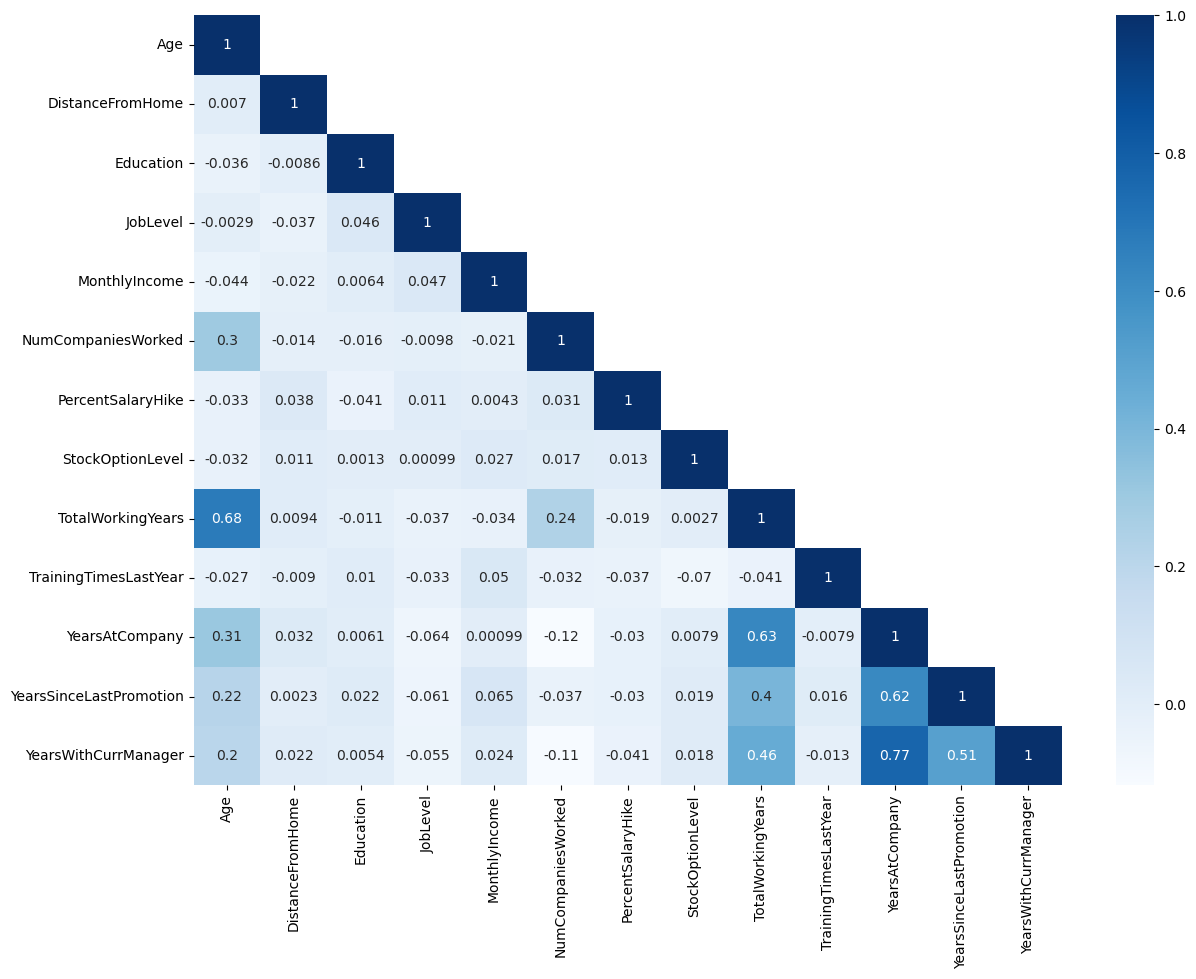

In [15]:
df_num = df.select_dtypes(include=['number'])

plt.figure(figsize=(14, 10))
corr_df = corr = df_num.corr(method='pearson')
df_lt = corr_df.where(np.tril(np.ones(corr_df.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap='Blues', annot=True)

## **Insights**

- Se tiene una correlación alta entre 'YearsAtCompany' y 'YearsWithCurrManager', al igual que 'TotalWorkingYears' y 'Age' pero no una colinealidad por lo que no es necesario eliminarlas por multicolinealidad.

In [16]:
df_num.sample(3)


,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1472,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3
3512,41,4,2,2,25430,3.0,12,0,6.0,3,1,0,0
3070,42,2,3,4,110310,3.0,12,1,8.0,2,5,1,2


In [17]:
cols_num = df.columns[[np.issubdtype(dt, np.number) for dt in df.dtypes]]

In [18]:
cols_num

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

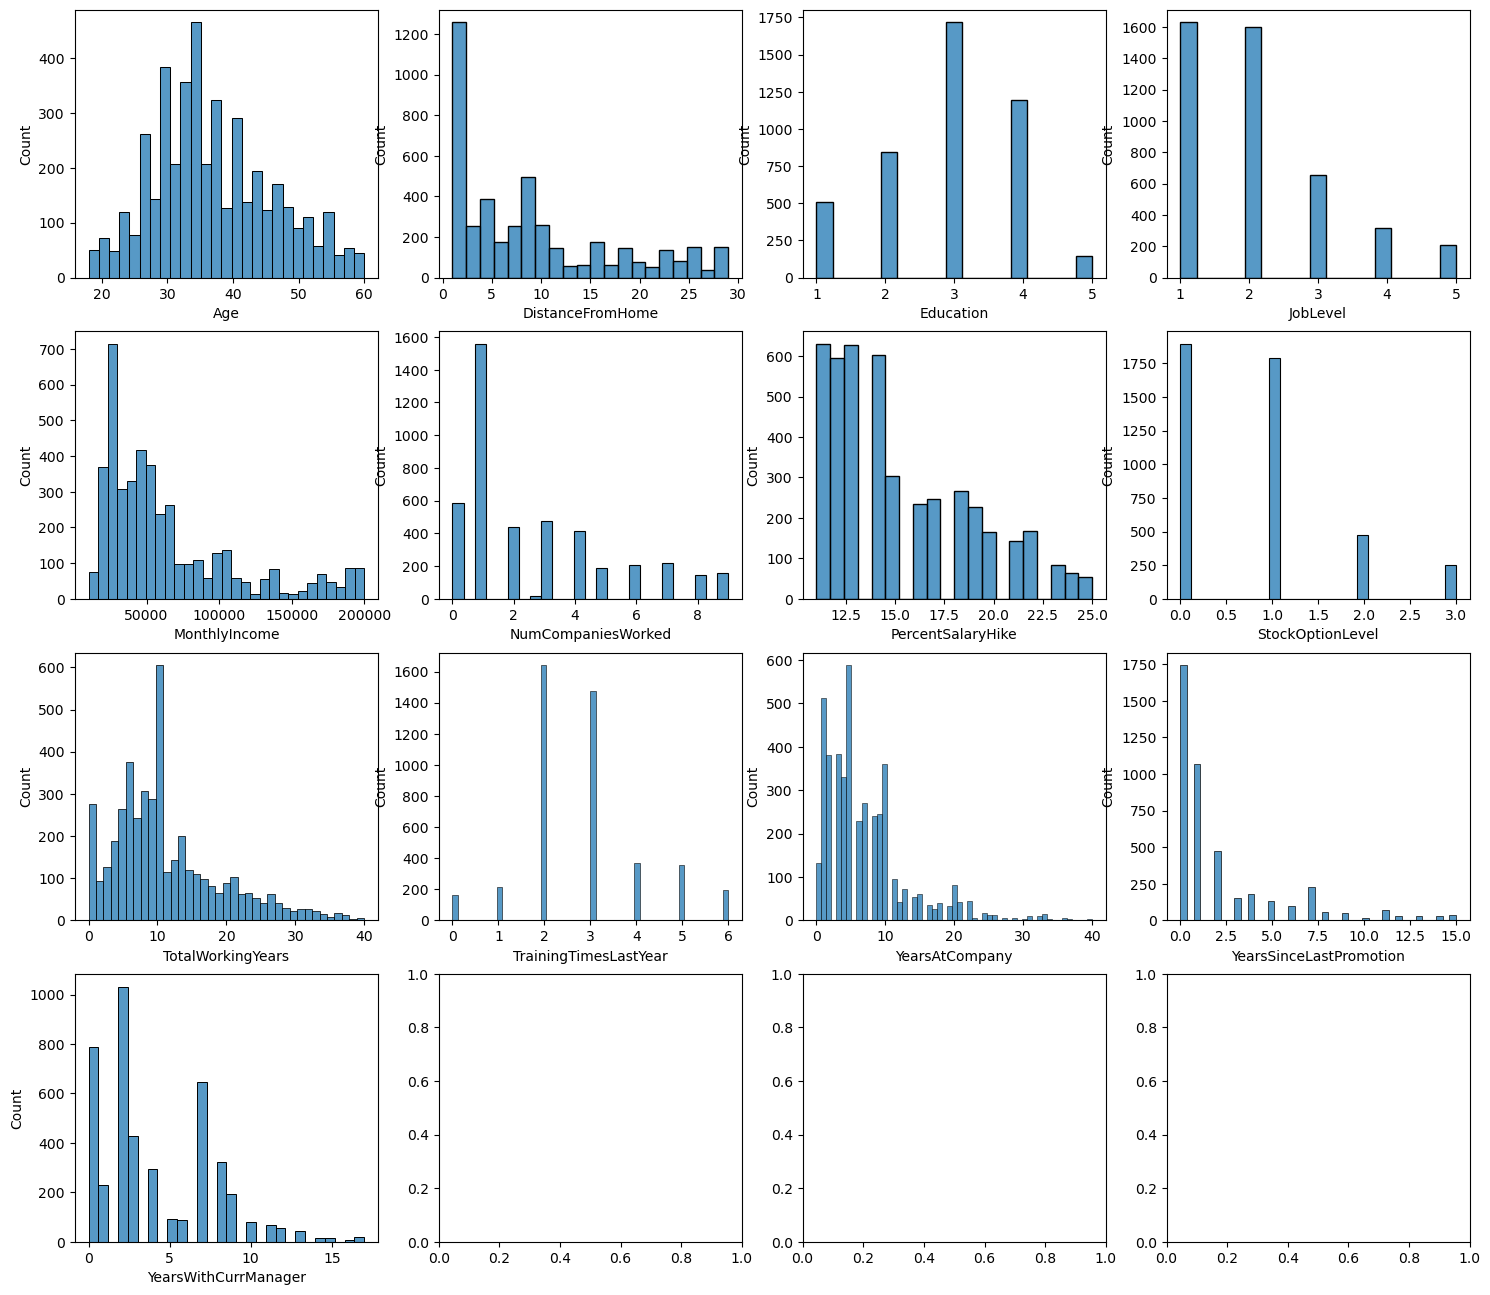

In [19]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df[column], ax=axes[i//4, i%4], kde=False)

## **Insights**

- Las columnas 'YarsAtCompany', 'TotalWorkingYears' y 'MonthlyIncome' parecen estar sesgadas.
- El rango de la variable 'MonthlyIncome' se podría estandarizar (está en los cientos de miles).
____

# **Análisis Bivariado**

In [20]:
pd.options.display.float_format = '{:.2f}'.format

In [21]:
df_num.groupby(['JobLevel']).mean().T

JobLevel,1,2,3,4,5
Age,36.78,37.37,36.27,36.38,37.58
DistanceFromHome,9.38,9.42,8.78,8.27,8.68
Education,2.84,2.95,2.94,3.05,2.93
MonthlyIncome,62677.42,65506.48,63545.32,77940.75,64698.41
NumCompaniesWorked,2.67,2.75,2.77,2.44,2.61
PercentSalaryHike,14.96,15.48,15.41,14.78,15.10
StockOptionLevel,0.82,0.76,0.79,0.72,0.96
TotalWorkingYears,11.35,11.65,10.72,10.99,10.09
TrainingTimesLastYear,2.88,2.77,2.65,2.80,2.84
YearsAtCompany,7.34,7.11,6.43,7.17,5.23


In [22]:
df_num.groupby(['StockOptionLevel']).mean()[['Age', 'Education', 'MonthlyIncome', 'YearsAtCompany']]

,Age,Education,MonthlyIncome,YearsAtCompany
StockOptionLevel,,,,
0,36.94,2.94,63077.61,7.04
1,37.28,2.87,66549.63,6.81
2,36.35,2.91,66898.92,7.72
3,35.38,3.02,65382.47,6.82


In [23]:
df_num.groupby(['StockOptionLevel']).median()[['Age', 'Education', 'MonthlyIncome', 'YearsAtCompany']]

,Age,Education,MonthlyIncome,YearsAtCompany
StockOptionLevel,,,,
0,36.00,3.00,47410.00,5.00
1,36.00,3.00,50790.00,5.00
2,36.00,3.00,49985.00,5.00
3,35.00,3.00,46800.00,5.00


____

# **Feature Engineering**

In [24]:
df2 = df.copy()

In [25]:
df2['BusinessTravel'] = df2['BusinessTravel'].astype('category')
df2['Department'] = df2['Department'].astype('category')
df2['EducationField'] = df2['EducationField'].astype('category')
df2['Gender'] = df2['Gender'].astype('category')

df2['NumCompaniesWorked'] = df2['NumCompaniesWorked'].fillna(0).astype(np.int64)

In [26]:
df2.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
1736,34,No,Travel_Rarely,Research & Development,18,1,Medical,Male,1,Healthcare Representative,Single,27030,1,21,1,9.00,2,8,7,7
1689,50,No,Travel_Frequently,Sales,2,2,Marketing,Male,1,Sales Executive,Married,29600,1,14,3,32.00,2,32,10,7
3650,36,No,Travel_Frequently,Sales,16,2,Life Sciences,Male,1,Research Scientist,Married,12810,2,11,0,17.00,2,15,6,13


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [28]:
print(df2['EducationField'].value_counts())
print(' ')
print(df2['BusinessTravel'].value_counts())
print(' ')
print(df2['Department'].value_counts())

EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64
 
BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
 
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64


## **NOTA**

Podemos cambiar el tipo de datos mediante un '.replace', es decir:

> df2['Attrition'] = df2['Attrition'].replace({'Yes':1, 'No':2}, regex=True)

o mediante la forma automática

> df2.Gender = df2.Gender.astype('category').cat.codes

In [29]:
df2.Attrition = df2.Attrition.astype('category').cat.codes
df2.Gender = df2.Gender.astype('category').cat.codes
df2.BusinessTravel = df2.BusinessTravel.astype('category').cat.codes
df2.Department = df2.Department.astype('category').cat.codes
df2.MaritalStatus = df2.MaritalStatus.astype('category').cat.codes
df2.JobRole = df2.JobRole.astype('category').cat.codes

In [30]:
df2.EducationField = df2.EducationField.astype('category').cat.codes

In [31]:
df2.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
2227,34,0,1,2,2,1,2,0,5,3,0,26860,5,11,0,10.00,3,4,1,3
1515,31,0,2,1,8,1,5,1,1,4,1,29360,4,12,1,10.00,2,8,7,7
2099,42,0,1,0,8,2,3,1,1,7,1,106480,3,13,1,20.00,1,1,0,0


In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int8   
 2   BusinessTravel           4410 non-null   int8   
 3   Department               4410 non-null   int8   
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   int8   
 7   Gender                   4410 non-null   int8   
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   int8   
 10  MaritalStatus            4410 non-null   int8   
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   int64  
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df2['MonthlyIncome_scale'] = StandardScaler().fit_transform(df2[['MonthlyIncome']])

In [34]:
df2.drop('MonthlyIncome', axis=1, inplace=True)

In [35]:
df2.sample(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_scale
3490,29,0,2,1,8,3,3,0,4,6,0,4,14,0,11.00,3,7,1,7,-0.26
2628,38,0,2,1,19,3,1,0,2,7,1,0,17,0,16.00,3,15,5,8,0.08
64,32,0,2,1,7,3,5,1,2,0,2,7,13,0,10.00,2,7,0,7,-0.86


In [36]:
df2.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
Gender                        2
JobLevel                      5
JobRole                       9
MaritalStatus                 3
NumCompaniesWorked           10
PercentSalaryHike            15
StockOptionLevel              4
TotalWorkingYears            41
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
MonthlyIncome_scale        1349
dtype: int64

In [37]:
cols_num = df2.columns[[np.issubdtype(dt, np.number) for dt in df2.dtypes]]
print(len(cols_num))

20


In [38]:
df2.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
NumCompaniesWorked         0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
MonthlyIncome_scale        0
dtype: int64

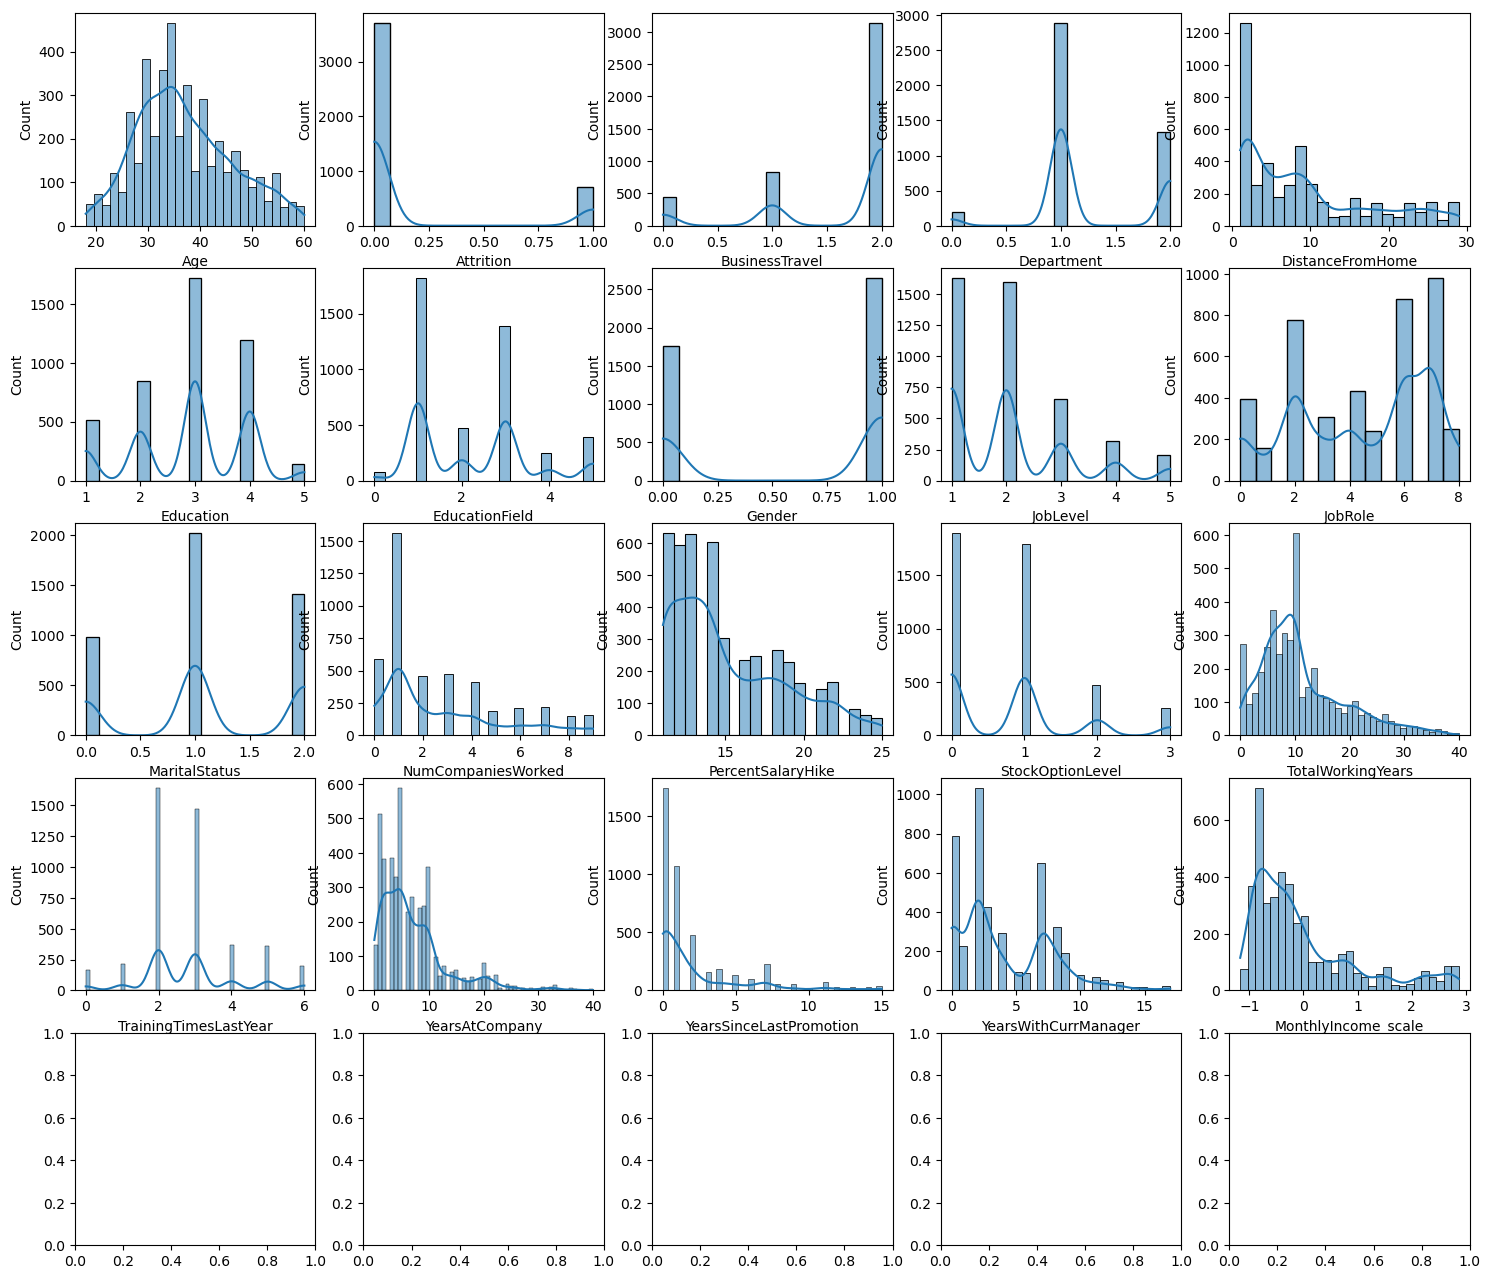

In [39]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(18,16))
for i, column in enumerate(cols_num):
    sns.histplot(df2[column], ax=axes[i//5, i%5], kde= True)

____
# **DataSplit**

In [40]:
from sklearn.model_selection import train_test_split

X = df2.drop('Attrition', axis=1)
y = df2['Attrition']

X_train, X_test, y_train, y_tes = train_test_split(X, y, test_size=0.30, random_state=1)

In [41]:
X.head(5)

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome_scale
0,51,2,2,6,2,1,0,1,0,1,1,11,0,1.00,6,1,0,0,1.41
1,31,1,1,10,1,1,0,1,6,2,0,23,1,6.00,3,5,1,4,-0.49
2,32,1,1,17,4,4,1,4,7,1,1,15,3,5.00,2,5,0,3,2.73
3,38,0,1,2,5,1,1,3,1,1,3,11,3,13.00,5,8,7,5,0.39
4,32,2,1,10,1,3,1,1,7,2,4,12,2,9.00,2,6,0,4,-0.88


In [42]:
y.head(5)

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int8

___
# **Regresión Logística**

In [43]:
print(df2['Attrition'].value_counts())
print(' ')
print(df2['Attrition'].value_counts(normalize=True))

Attrition
0    3699
1     711
Name: count, dtype: int64
 
Attrition
0   0.84
1   0.16
Name: proportion, dtype: float64


In [44]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', class_weight='balanced')

In [45]:
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [46]:
y_predict = model.predict(X_test)

In [47]:
y_predict[0:200]

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1], dtype=int8)

In [48]:
z = X_test.copy()
z['Attrition real'] = y_tes
z['Attrition predicción'] = y_predict
z[['Attrition real', 'Attrition predicción']].head(20)

,Attrition real,Attrition predicción
2016,0,0
4118,0,1
219,0,0
4402,1,0
787,0,0
200,0,0
2539,0,0
3744,0,1
1891,0,1
3963,1,1


In [49]:
coef_df = pd.DataFrame(model.coef_)
coef_df.columns = X.columns

coef_df['intercept'] = model.intercept_
coef_df.T

,0
Age,-0.03
BusinessTravel,0.02
Department,-0.28
DistanceFromHome,0.00
Education,-0.04
EducationField,-0.08
Gender,0.12
JobLevel,-0.07
JobRole,0.05
MaritalStatus,0.62


# **Matriz de Confusión**

Text(0.5, 1.0, 'Matriz de Confusión')

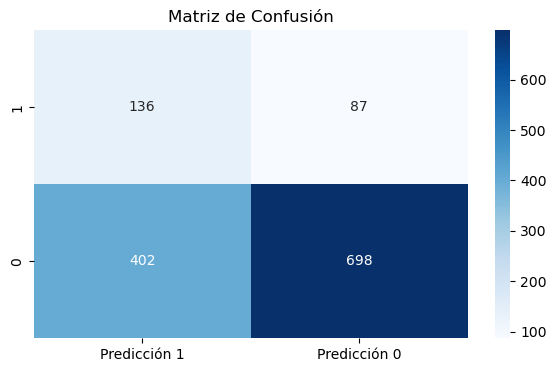

In [51]:
cm=metrics.confusion_matrix(y_tes, y_predict, labels=[1,0])

df_cm = pd.DataFrame(cm, index = [i for i in ['1','0']],
                     columns= [i for i in ['Predicción 1', 'Predicción 0']])
plt.figure(figsize=(7,4))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d').set_title('Matriz de Confusión')

In [53]:
TP = df_cm.iloc[0, 0]
FP = df_cm.iloc[0, 1]
FN = df_cm.iloc[1, 0]
TN = df_cm.iloc[1, 1]

# **Calificación del Modelo**

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_tes, y_pred)
recall_score = recall_score(y_tes, y_pred)
precision_score = precision_score(y_tes, y_pred)
f1_score = f1_score(y_tes, y_pred)

print('Medidas del Modelo')
print(' ')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Roc Auc Score = {0:0.2f}'.format(roc_auc_score(y_tes, y_pred)))

Medidas del Modelo
 
Accuracy = 0.63
Precision = 0.25
Recall = 0.61
F1 Score = 0.36
Roc Auc Score = 0.62


# **CONCLUSIONES CLASE BALANCEADA**

- Tenemos una calificación o un porcentaje de acierto de 63%. Esto lo conseguimos con **Clases Balanceada**.

_________

# **Nuevo Intento con Clases NO Balanceadas**

In [57]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [58]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)
model_score = accuracy_score(y_tes, y_pred)
recall_score = recall_score(y_tes, y_pred)
precision_score = precision_score(y_tes, y_pred)
f1_score = f1_score(y_tes, y_pred)

print('Medidas del Modelo')
print(' ')
print('Accuracy = {0:0.2f}'.format(model_score))
print('Precision = {0:0.2f}'.format(precision_score))
print('Recall = {0:0.2f}'.format(recall_score))
print('F1 Score = {0:0.2f}'.format(f1_score))
print('Roc Auc Score = {0:0.2f}'.format(roc_auc_score(y_tes, y_pred)))

Medidas del Modelo
 
Accuracy = 0.84
Precision = 0.82
Recall = 0.06
F1 Score = 0.12
Roc Auc Score = 0.53


# **CONCLUSIONES CLASE NO BALANCEADA**

- Nuestro modelo de predicción pasa del 63% al 84%